In [170]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [171]:
# Load the image from file
img = cv2.imread('/content/55519611_644632512626402_4828710067354206208_n.jpg')

In [172]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [173]:
# ----- Acne Detection -----

# Apply Gaussian blur to remove noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

In [174]:
# Apply threshold to convert to binary image
_, thresh = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY_INV)

In [175]:
# Apply morphological operations to remove small white regions and fill small black regions
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(thresh, kernel, iterations=1)
dilation = cv2.dilate(erosion, kernel, iterations=1)

In [176]:
# Find contours and draw bounding box around each contour
contours, _ = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    if cv2.contourArea(contour) > 1000 and cv2.contourArea(contour) < 5000:
        x,y,w,h = cv2.boundingRect(contour)
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2)

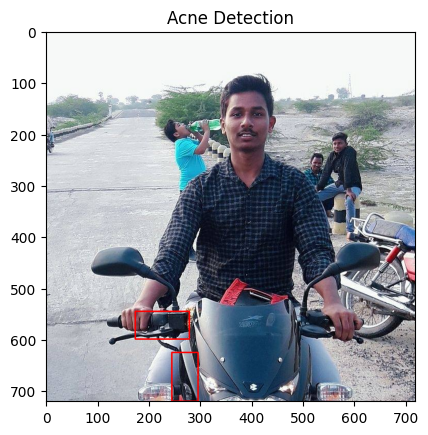

In [177]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Acne Detection')
plt.show()

In [178]:
# ----- Detect Oiliness on face -----

# Convert the image to LAB color space
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

In [179]:
# Split the LAB channels
L, A, B = cv2.split(lab)

In [180]:
# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to the L channel
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(L)

In [181]:
# Merge the enhanced L channel with the original A and B channels
limg = cv2.merge((cl,A,B))

In [182]:
# Convert the image back to RGB color space
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

In [183]:
# Apply thresholding to detect oily regions
gray = cv2.cvtColor(final, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

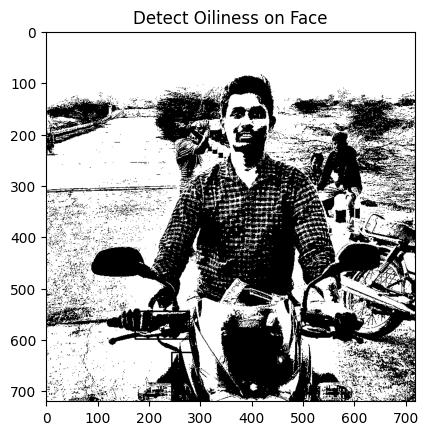

In [184]:
plt.imshow(thresh, cmap='gray')
plt.title('Detect Oiliness on Face')
plt.show()

In [185]:
# ----- Make a UV filter -----

# Convert the image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [186]:
# Create a mask for the blue sky (hues between 100 and 140)
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([140, 255, 255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)

In [187]:
# Apply the mask to the original image
filtered = cv2.bitwise_and(img, img, mask=mask)

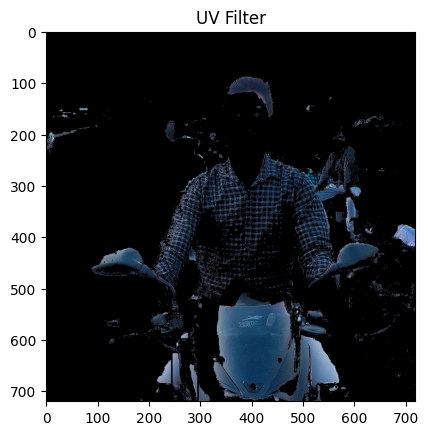

In [188]:
plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))
plt.title('UV Filter')
plt.show()

In [189]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [190]:
# Function to perform acne detection
def acne_detection(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to remove noise
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply threshold to convert to binary image
    _, thresh = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY_INV)

    # Apply morphological operations to remove small white regions and fill small black regions
    kernel = np.ones((5,5), np.uint8)
    erosion = cv2.erode(thresh, kernel, iterations=1)
    dilation = cv2.dilate(erosion, kernel, iterations=1)

    # Find contours and draw bounding box around each contour
    contours, _ = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        if cv2.contourArea(contour) > 1000 and cv2.contourArea(contour) < 5000:
            x,y,w,h = cv2.boundingRect(contour)
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2)

    return img

In [191]:
# Function to detect oiliness on the face
def oiliness_detection(img):
    # Convert the image to LAB color space
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    # Split the LAB channels
    L, A, B = cv2.split(lab)

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to the L channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(L)

    # Merge the enhanced L channel with the original A and B channels
    limg = cv2.merge((cl,A,B))

    # Convert the image back to RGB color space
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

    # Apply thresholding to detect oily regions
    gray = cv2.cvtColor(final, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

    return thresh

In [192]:
# Function to apply a UV filter
def uv_filter(img):
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Create a mask for the blue sky (hues between 100 and 140)
    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Apply the mask to the original image
    filtered = cv2.bitwise_and(img, img, mask=mask)

    return filtered

In [193]:
# Load the face images from file
img1 = cv2.imread('/content/50898601_157466488573792_3722053241790267392_n.jpg')
img2 = cv2.imread('/content/55519611_644632512626402_4828710067354206208_n.jpg')
img3 = cv2.imread('/content/IMG_20190225_201108.jpg')

In [194]:
# Perform acne detection on each image
acne_img1 = acne_detection(img1)
acne_img2 = acne_detection(img2)
acne_img3 = acne_detection(img3)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

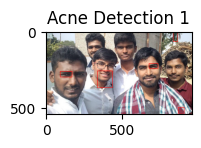

In [195]:
plt.subplot(131), plt.imshow(cv2.cvtColor(acne_img1, cv2.COLOR_BGR2RGB)), plt.title('Acne Detection 1')
plt

In [196]:
# Perform oiliness detection and UV filtering on each image
oiliness_img1 = oiliness_detection(img1)
uv_img1 = uv_filter(img1)

oiliness_img2 = oiliness_detection(img2)
uv_img2 = uv_filter(img2)

oiliness_img3 = oiliness_detection(img3)
uv_img3 = uv_filter(img3)

<ipython-input-206-05a283a4adf9>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), plt.title('Original')
<ipython-input-206-05a283a4adf9>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(232), plt.imshow(acne_img1, cmap='gray'), plt.title('Acne Detection')
<ipython-input-206-05a283a4adf9>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(233), plt.imshow(oiliness_img1, cmap='gray'), plt.title('Oiliness Detection')
<ipython-input-206-05a283a4adf9>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is depre

ValueError: ignored

<Figure size 1200x800 with 0 Axes>

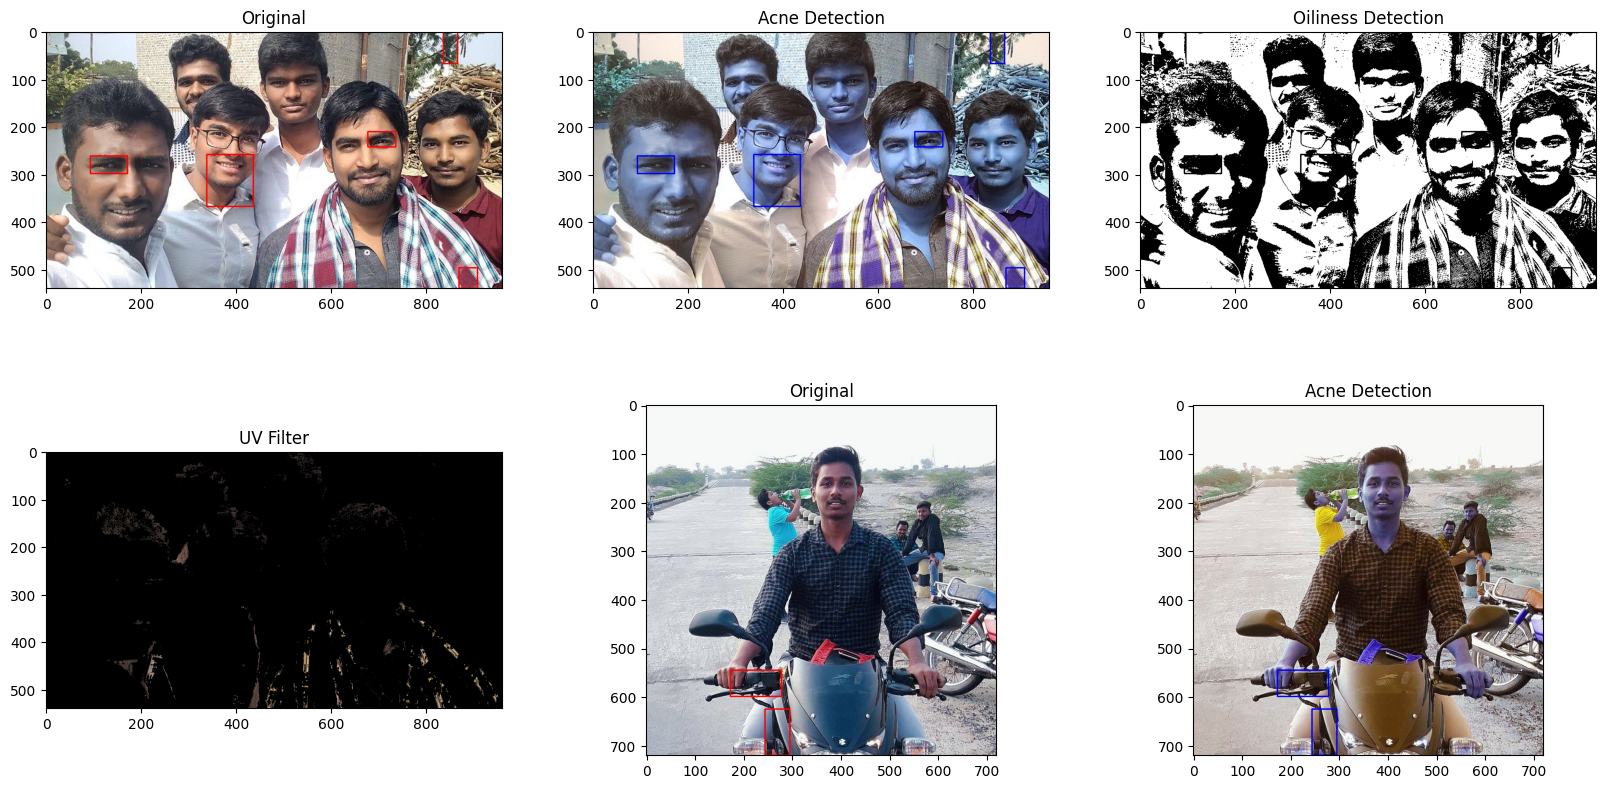

In [206]:

# Display the results
plt.figure(figsize=(12,8))

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

plt.subplot(231), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(232), plt.imshow(acne_img1, cmap='gray'), plt.title('Acne Detection')
plt.subplot(233), plt.imshow(oiliness_img1, cmap='gray'), plt.title('Oiliness Detection')
plt.subplot(234), plt.imshow(uv_img1, cmap='gray'), plt.title('UV Filter')

plt.subplot(235), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(236), plt.imshow(acne_img2, cmap='gray'), plt.title('Acne Detection')
plt.subplot(237), plt.imshow(oiliness_img2, cmap='gray'), plt.title('Oiliness Detection')
plt.subplot(238), plt.imshow(uv_img2, cmap='gray'), plt.title('UV Filter')

plt.subplot(239), plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(2,3,6), plt.imshow(acne_img3, cmap='gray'), plt.title('Acne Detection')
plt.subplot(2,3,5), plt.imshow(oiliness_img3, cmap='gray'), plt.title('Oiliness Detection')
plt.subplot(2,3,4), plt.imshow(uv_img3, cmap='gray'), plt.title('UV Filter')

plt.tight_layout()
plt.show()